# Activation and Loss Function Exploration Exercise

## Background
This exercise aims to explore the effects of different activation and loss functions on a neural network's learning and performance. You will modify a simple neural network in TensorFlow to experiment with these functions.

## Activation Functions
Common activation functions include:

* Sigmoid
* ReLU (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent)

## Loss Functions
Some standard loss functions are:

* Mean Squared Error (MSE) - typically used for regression tasks
* Binary Cross-Entropy - used for binary classification
* Categorical Cross-Entropy - used for multi-class classification

# Setup
First, let's import TensorFlow and other necessary libraries. Run the cell below to import them.


In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

## Dataset Preparation
We'll use a synthetic dataset for binary classification. The 'make_moons' function from scikit-learn generates a two-moon dataset, which is ideal for this experiment.

In [77]:
# Generate points and classification ground truth
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

shapes_to_print = {
    "X": X,
    "y": y,
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_test,
    "y_test": y_test,
}

for name, array in shapes_to_print.items():
    print(f"shape of {name}: {np.shape(array)}")

shape of X: (1000, 2)
shape of y: (1000,)
shape of X_train: (700, 2)
shape of y_train: (700,)
shape of X_test: (300, 2)
shape of y_test: (300,)


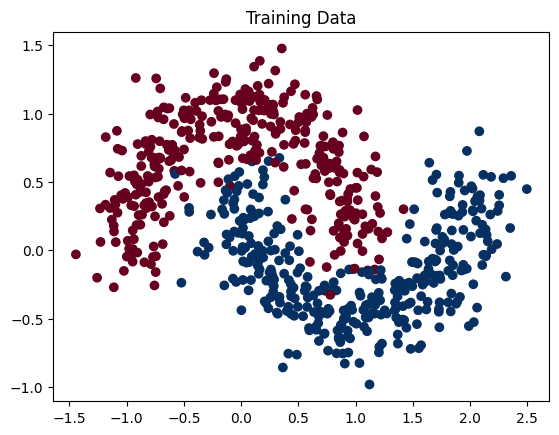

In [78]:
# Visualize the dataset
# y_train is the ground truth
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()


## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [79]:
def build_model(activation_function='relu', loss_function='binary_crossentropy'):
    model = tf.keras.models.Sequential([
        # NOTE: When using sequential and specifying the first dense layer with an "input_shape",
        # TF automatically creates an input layer with the shape provided by "input_shape". Sneaky bastard.
        tf.keras.layers.Dense(10, activation=activation_function, input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model


# Training and evaluating the model
Let's train the model and see how well it solves the problem.

In [80]:
# Function to train, evaluate, and visualize model predictions along with ground truth
def train_and_evaluate_model(model, epochs=100):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    
    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Plotting training history
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Predicting on test data
    # Numpy magic again. model.predict returns an array with probabilities of the output being a 1 or a 0. e.g 0.69.
    # We take the ones that are above 0.5 and set them to True, the others to False. thus we get an array which
    # looks like this [True, False, False, True, True, False, True, ...]. i.g we quantify the predictions. either True or Fals
    predictions = model.predict(X_test) > 0.5

    # Plotting model predictions
    plt.subplot(1, 3, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
    plt.title('Model Predictions on Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plotting ground truth
    plt.subplot(1, 3, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.title('Ground Truth for Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.show()

    return test_loss, test_accuracy

10/10 [==============================] - 0s 3ms/step


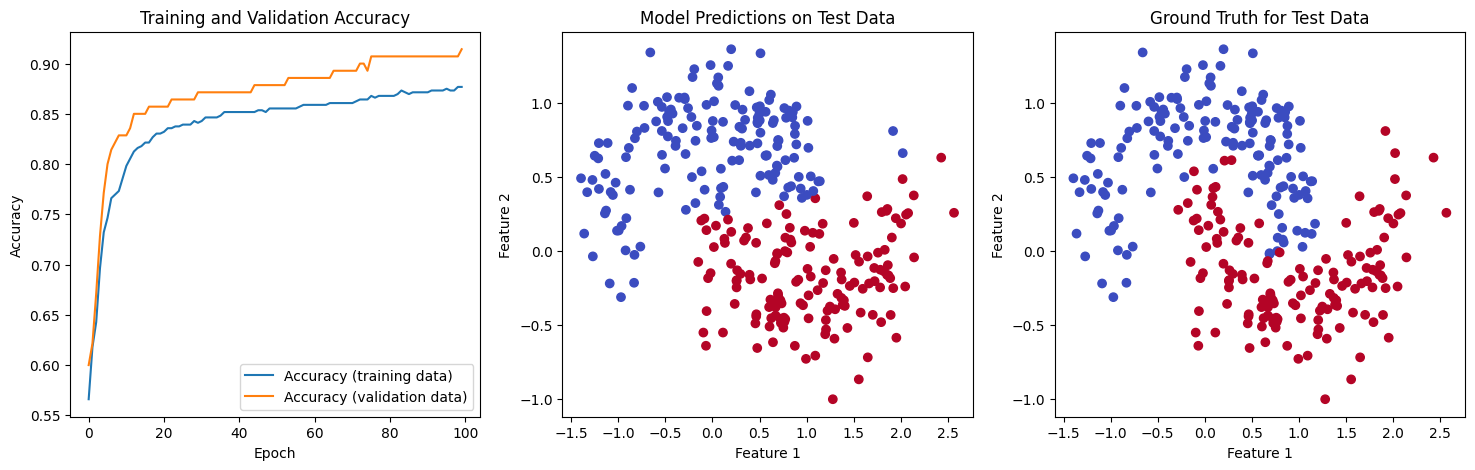

Test Loss: 0.2282

Test Accuracy: 0.9067


In [81]:
# Example of using the function with a specific activation and loss function
model = build_model(activation_function='relu', loss_function='binary_crossentropy')
test_loss, test_accuracy = train_and_evaluate_model(model, epochs=100)
    
print(f"Test Loss: {test_loss:.4f}\n")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Experimentation
## Task 1: Activation Functions
1. Experiment with different activation functions in the hidden layer. Replace activation_function in build_model with 'sigmoid', 'relu', and 'tanh'.
2. Train the model for each activation function and evaluate its performance on the test set.
3. Record your observations.

## Task 2: Loss Functions
1. Now, experiment with different loss functions. For binary classification, try 'binary_crossentropy' and 'mean_squared_error'.
2. Train and evaluate the model for each loss function.
3. Record your observations.

# Analysis and Questions
After completing the tasks, answer the following questions:

1. How did different activation functions affect the model's performance?
2. How did different loss functions impact the learning process and accuracy?
3. Which combination of activation and loss function provided the best results for this task?

# Conclusion
Summarize your findings and discuss why certain combinations might work better than others for this specific problem.

10/10 [==============================] - 0s 2ms/step


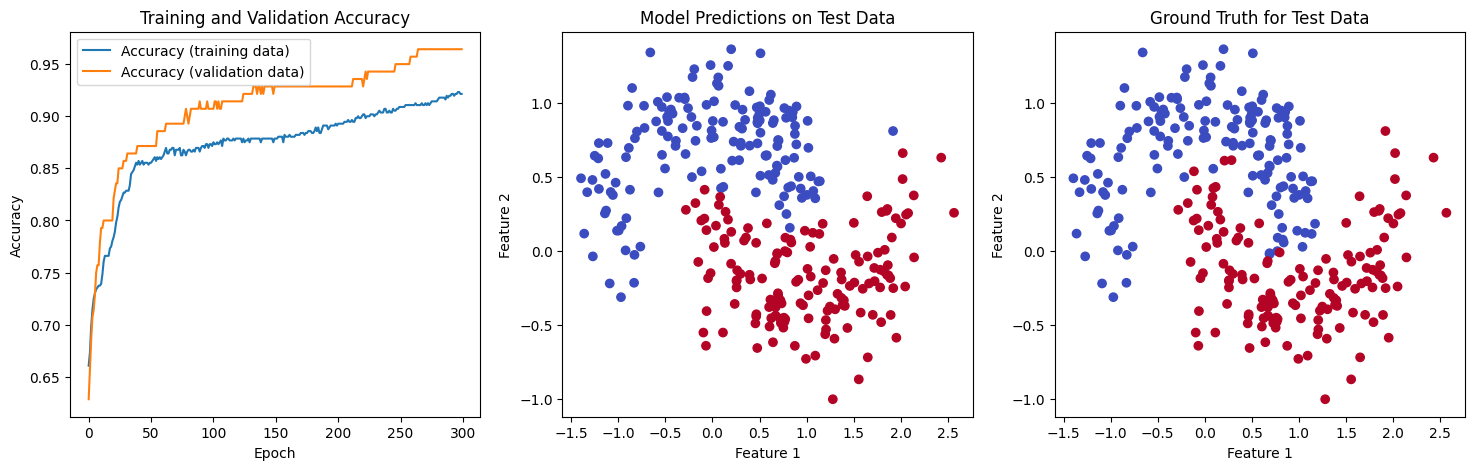

Activation/loss function: relu/binary_crossentropy
Test Loss: 0.1506
Test Accuracy: 0.9433
10/10 [==============================] - 0s 2ms/step


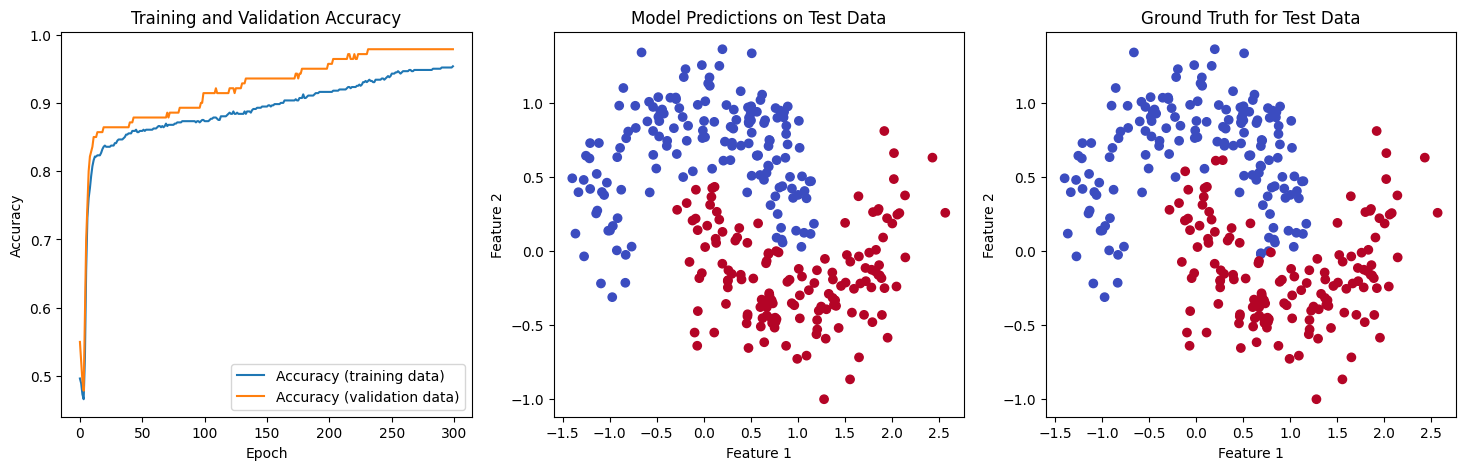

Activation/loss function: relu/mean_squared_error
Test Loss: 0.0322
Test Accuracy: 0.9800
10/10 [==============================] - 0s 2ms/step


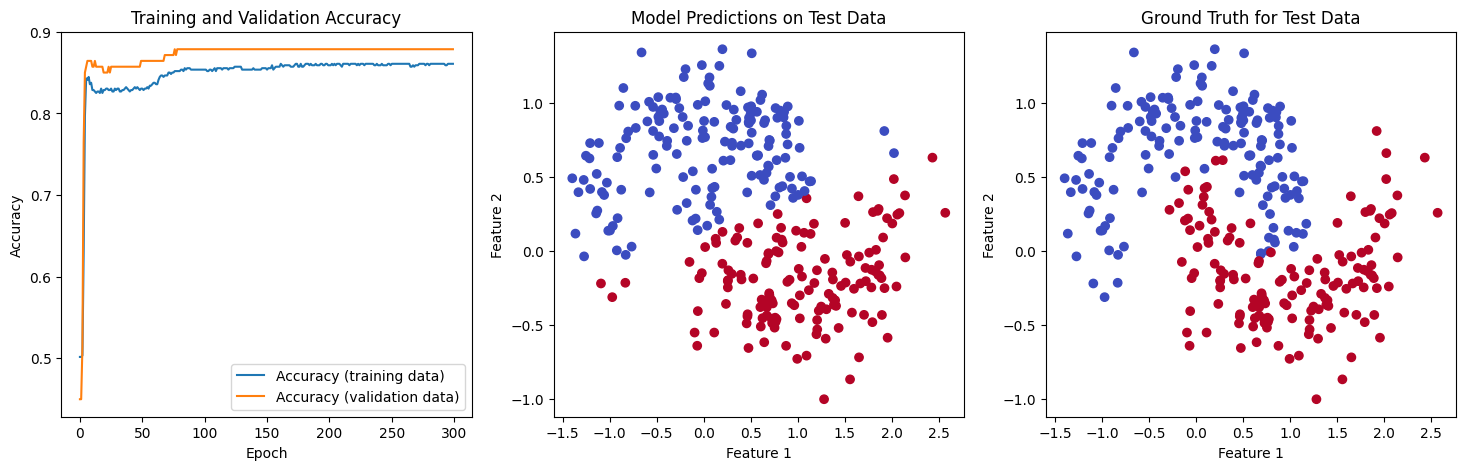

Activation/loss function: sigmoid/binary_crossentropy
Test Loss: 0.2668
Test Accuracy: 0.8833
10/10 [==============================] - 0s 3ms/step


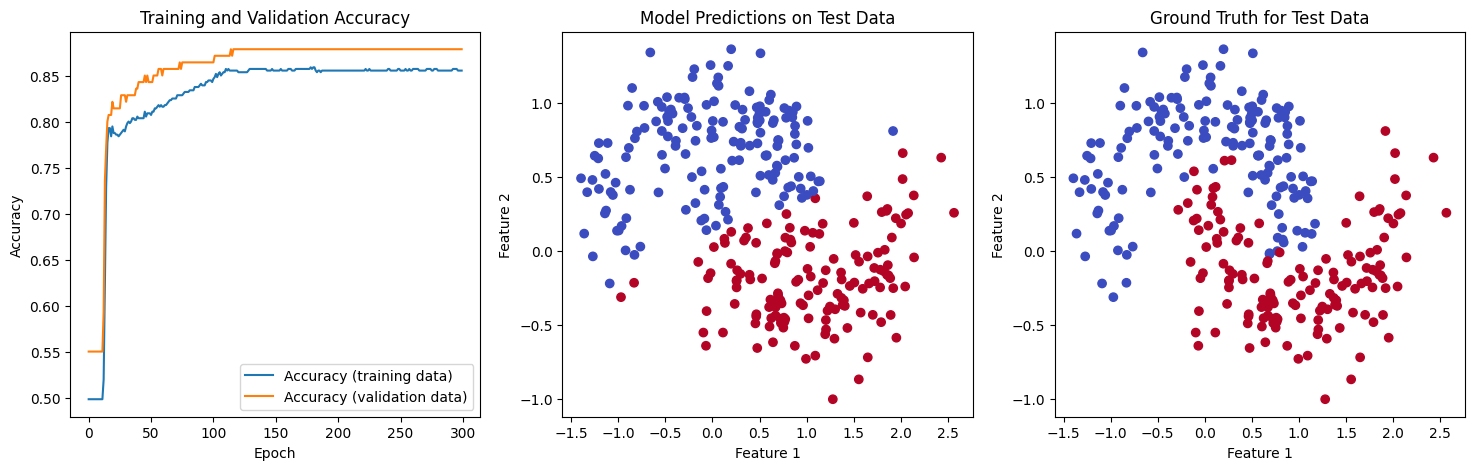

Activation/loss function: sigmoid/mean_squared_error
Test Loss: 0.0844
Test Accuracy: 0.8900
10/10 [==============================] - 0s 2ms/step


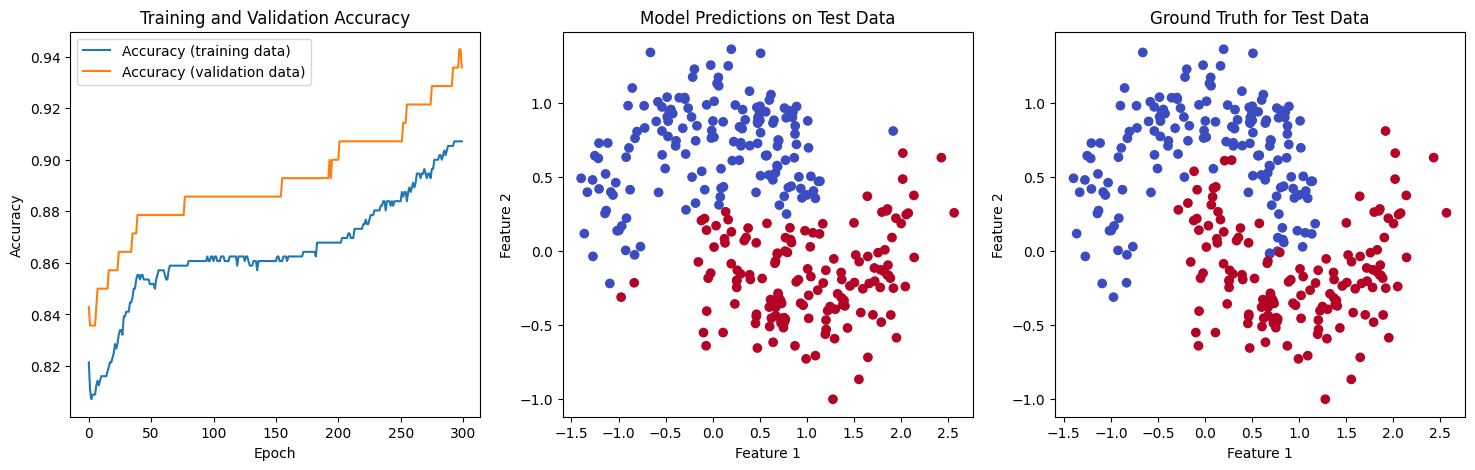

Activation/loss function: tanh/binary_crossentropy
Test Loss: 0.1840
Test Accuracy: 0.9167
10/10 [==============================] - 0s 2ms/step


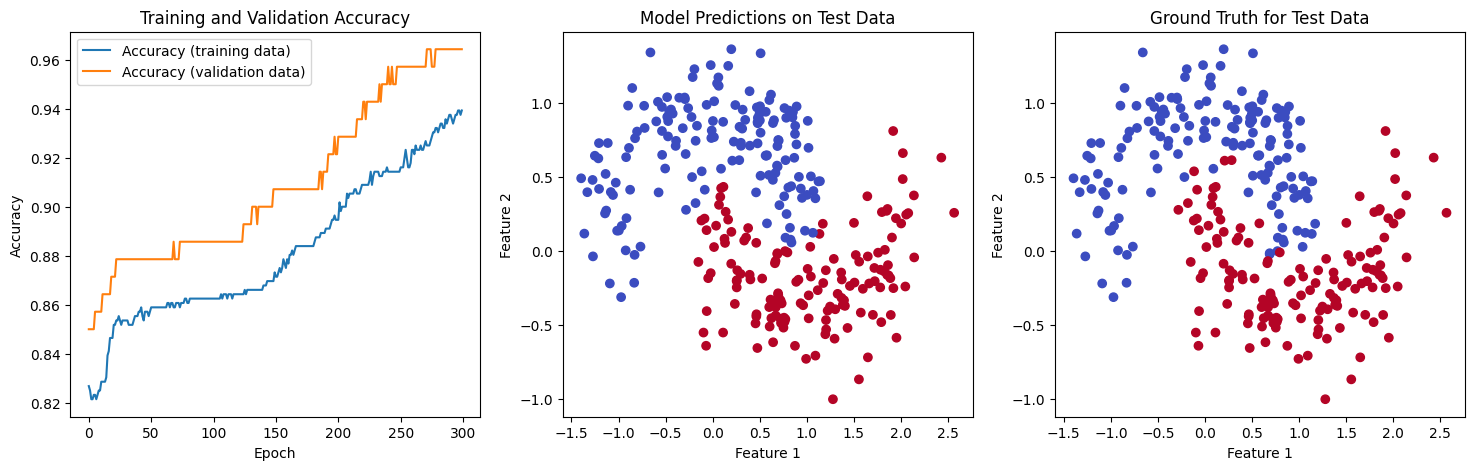

Activation/loss function: tanh/mean_squared_error
Test Loss: 0.0417
Test Accuracy: 0.9567


In [85]:
# Extremely quick and dirty

activation_functions = ['relu', 'sigmoid', 'tanh']
loss_functions = ['binary_crossentropy', 'mean_squared_error']

# Example of using the function with a specific activation and loss function
for activation_function in activation_functions:
    for loss_function in loss_functions:
        
        # Example of using the function with a specific activation and loss function
        model = build_model(activation_function=activation_function, loss_function=loss_function)
        test_loss, test_accuracy = train_and_evaluate_model(model, epochs=300)
    
        print(f"Activation/loss function: {activation_function}/{loss_function}")
        print(f"Test Loss: {test_loss:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")

Appears as though relu/mean_squared_error is the best choice here. At least for 100 epochs.